In [2]:
import pandas as pd 
import statistics
import seaborn as sns
import numpy as np #for summary statistics 
import matplotlib.pyplot as plt #for plotting 
from scipy.stats import ttest_ind #for statistical significance tests 
from scipy.stats import sem # for standard error


In [3]:

import mysql.connector

mydb = mysql.connector.connect(
  host="mysql", database='ALY2100', user="ALY2100", password="homework"
)

mycursor = mydb.cursor()
query = "DROP TABLE IF EXISTS JoinUSHospitalData "
mycursor.execute(query)

myjoin = "SELECT * FROM StateHospAM, USHospitalData WHERE StateHospAM.ein = USHospitalData.data_ein "
mycursor.execute(myjoin)
joinRes = mycursor.fetchall()
dfJoin=pd.read_sql(myjoin,mydb)
dfJoin

,hospital_id,hospital_org_id,ein,name,name_cr,street_address,city,state,zip_code,fips_state_and_county_code,...,pctttlexp_econdevlp,pctttlexp_cmntysuprt,pctttlexp_envrnimprv,pctttlexp_ldrdevlp,pctttlexp_cltnbldg,pctttlexp_htlhimprvadvcy,pctttlexp_wrkfrcdevlp,pctttlexp_other,pctttlexp_total,updated_dt
0,1,1,630307951,Mizell Memorial Hospital,Mizell Memorial Hospital,702 Main Street,Opp,AL,36462,1039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
1,1,1,630307951,Mizell Memorial Hospital,Mizell Memorial Hospital,702 Main Street,Opp,AL,36462,1039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
2,1,1,630307951,Mizell Memorial Hospital,Mizell Memorial Hospital,702 Main Street,Opp,AL,36462,1039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
3,1,1,630307951,Mizell Memorial Hospital,Mizell Memorial Hospital,702 Main Street,Opp,AL,36462,1039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
4,1,1,630307951,Mizell Memorial Hospital,Mizell Memorial Hospital,702 Main Street,Opp,AL,36462,1039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113585,3386,2579,830300467,Powell Valley Health Care,Powell Valley Health Care,777 Avenue H,Powell,WY,82435,56029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
113586,3386,2579,830300467,Powell Valley Health Care,Powell Valley Health Care,777 Avenue H,Powell,WY,82435,56029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
113587,3386,2579,830300467,Powell Valley Health Care,Powell Valley Health Care,777 Avenue H,Powell,WY,82435,56029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
113588,3386,2579,830300467,Powell Valley Health Care,Powell Valley Health Care,777 Avenue H,Powell,WY,82435,56029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"


In [3]:
dfJoin.describe()

# What are the range and average spending by the hospital on each community benefit, community building, and community health improvement advocacy activities?
# community benefit  Min -1.275343e+08 and max 1.881578e+09 mean 9.391667e+07
# community building mean 1.070129e+06 min -4.441750e+05 max 2.233811e+07
# community health improvement advocacy activities mean 1.439394e+05 min -1.336279e+06 max 2.131054e+07

,hospital_id,hospital_org_id,ein,zip_code,fips_state_and_county_code,hospital_bed_count,medicare_provider_number,Unnamed: 0,hospital_data_id,fiscal_yr,...,pctttlexp_physimprvhse,pctttlexp_econdevlp,pctttlexp_cmntysuprt,pctttlexp_envrnimprv,pctttlexp_ldrdevlp,pctttlexp_cltnbldg,pctttlexp_htlhimprvadvcy,pctttlexp_wrkfrcdevlp,pctttlexp_other,pctttlexp_total
count,113590.000000,113590.000000,1.135900e+05,113590.000000,113590.000000,113590.000000,113590.000000,113590.000000,113590.000000,113590.000000,...,113590.000000,113590.000000,113590.000000,113590.000000,113590.000000,113590.000000,113590.000000,113590.000000,113590.000000,113590.000000
mean,1609.796857,868.443331,6.214670e+08,64253.284691,27651.461933,211.618400,255761.933410,4.308672,14043.029624,2014.691364,...,0.000045,0.000051,0.000113,0.000016,0.000010,0.000043,0.000154,0.000140,0.000023,0.000600
std,1112.158575,816.588831,2.670265e+08,26935.353150,17199.786075,240.412226,172064.331077,2.803060,9868.299392,2.848262,...,0.002213,0.004244,0.004176,0.002969,0.000164,0.001970,0.009014,0.001782,0.001463,0.013051
min,1.000000,1.000000,1.013043e+07,1040.000000,1003.000000,2.000000,10007.000000,0.000000,1.000000,2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,405.000000,139.000000,3.839526e+08,44870.000000,8014.000000,40.000000,60008.000000,2.000000,3301.000000,2012.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1597.000000,540.000000,6.105946e+08,66502.000000,27155.000000,147.000000,241371.000000,4.000000,13915.000000,2015.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100
75%,2634.000000,1580.000000,9.403828e+08,89113.000000,42083.000000,297.000000,390178.000000,7.000000,23344.000000,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000400
max,3423.000000,2591.000000,9.902698e+08,99969.000000,56043.000000,2891.000000,670122.000000,9.000000,30077.000000,2019.000000,...,0.462600,1.000000,0.870000,1.000000,0.030000,0.635400,1.000000,0.280000,0.390000,1.000000


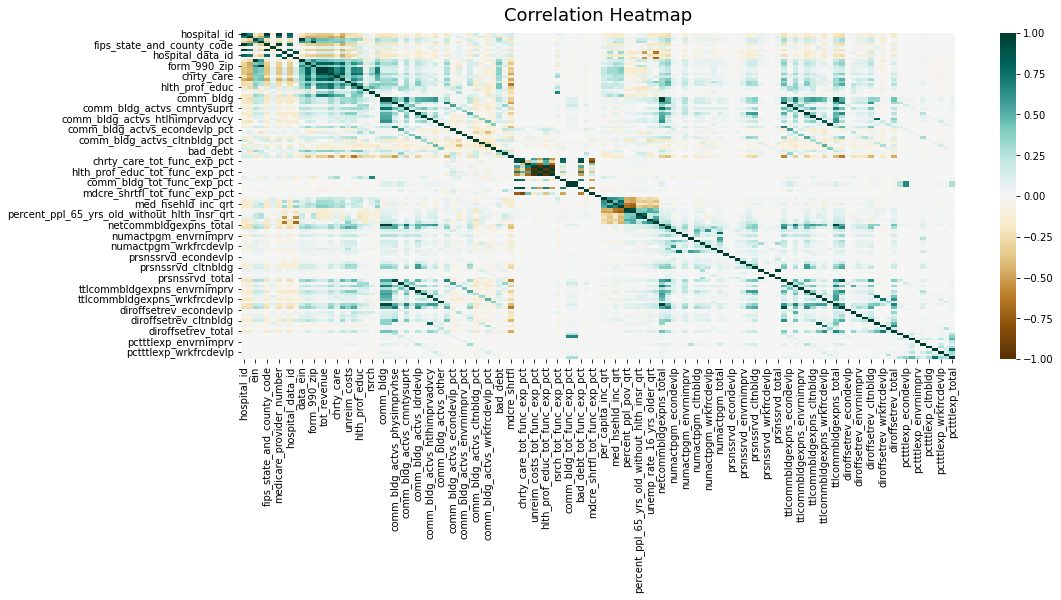

In [3]:
## # In this section, we compute all pairewise correlation between the columns of our data frame using corr() function. and we visulize it as a heatmap.
# you can see some of the variables are positively correlated with eachother, and some of the other variables are negatively
# correlated with each other. The correlation of each variable with itself is 1 as expected (all the diagonal entry of the data frame)
# this give us overall picture of the dependancies bettween all variables in our data frame
## there are blocks of varaibles that are storngly positively correlation with each other, and also there are blocks of variables that are negatively correlated 
# with eachother
## Why we need to look at the correlation between the columns (variables/features)? Since having alot of highly correlated features in the model might decreses the perfromance accuacy of our logistic regression.
# Also, we can visually check out which variable highly correlated with target variables (this can help us to choose right featurss)
import seaborn as sns

MyCorr=dfJoin.corr()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(MyCorr, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);



In [77]:
# values= ['Y']
# dfJoin_urban = dfJoin[dfJoin['urban_location_f'].isin(values)]

# values= ['N']
# dfJoin_rural = dfJoin[dfJoin['urban_location_f'].isin(values)]

# #dfJoin_urban = dfJoin.urban_location_f

# dfJoin_urban["bad_debt"].plot(kind = 'hist',label="Urben",alpha=0.5, bins=100)
# dfJoin_rural["bad_debt"].plot(kind = 'hist',label="Rural",alpha=0.5, bins=100)
# plt.legend(loc='best')
# plt.show






In [4]:
## In this section, we staert doing some exploratory analysis to choose meangiful features for our regeression models.


## Our cirteria for feature selections are: i) they should be numeric, ii) they should be  normally distributed (close to normal distirbution) iii) they are not highly correlated with other features.

## To achive this, we first compute all pairwise correlation between all the featurs, and plot as heatmap to see the gloabal landacape of features dependecies. Then, we use histogram as tool to look at the distibutions of these features (ideally they
#have distribution close to normal,), and also we think whether these features (e.g. number of bed) might be good indicator of an hospital being rural or urbun, 
## Also some of the features has mostly zero values (very low level of variance) we filter them out as well.


## Print out list of numeric feauters.
dfJoin_Numberic=dfJoin._get_numeric_data()

for col in dfJoin_Numberic.columns:
    print(col)

hospital_id
hospital_org_id
ein
zip_code
fips_state_and_county_code
hospital_bed_count
medicare_provider_number
Unnamed: 0
hospital_data_id
fiscal_yr
data_ein
form_990_num_fac_oper
form_990_zip
tot_func_exp
tot_revenue
tot_comm_bnfts
chrty_care
unreim_medcd
unreim_costs
comm_hlth_impr_svcs_comm_bnft_oper
hlth_prof_educ
subsd_hlth_svcs
rsrch
cash_inknd_contrib_comm_grps
comm_bldg
comm_bldg_actvs
comm_bldg_actvs_physimprvhse
comm_bldg_actvs_econdevlp
comm_bldg_actvs_cmntysuprt
comm_bldg_actvs_envrnimprv
comm_bldg_actvs_ldrdevlp
comm_bldg_actvs_cltnbldg
comm_bldg_actvs_htlhimprvadvcy
comm_bldg_actvs_wrkfrcdevlp
comm_bldg_actvs_other
comm_bldg_actvs_physimprvhse_pct
comm_bldg_actvs_econdevlp_pct
comm_bldg_actvs_cmntysuprt_pct
comm_bldg_actvs_envrnimprv_pct
comm_bldg_actvs_ldrdevlp_pct
comm_bldg_actvs_cltnbldg_pct
comm_bldg_actvs_htlhimprvadvcy_pct
comm_bldg_actvs_wrkfrcdevlp_pct
comm_bldg_actvs_other_pct
bad_debt
bad_debt_tot_func_exp_atrb_pat_elig_fncl_asst
mdcre_shrtfl
tot_comm_bnfts_tot

In [79]:
## Here we look at the histogram of some of the featurs, and we overlay them based on target varible (urben vs rural). The goal is that, first to check if their distirubtion
## looks normal, and also whether do we see some difference about the distribution of this features between urben and rural. If we see clear sepration of distibtuoin for this
## Feature between urben and rural means that this can be really good feature to include in our regression model for accurate prediction of the target label
values= ['Y']
dfJoin_urban = dfJoin[dfJoin['urban_location_f'].isin(values)]

values= ['N']
dfJoin_rural = dfJoin[dfJoin['urban_location_f'].isin(values)]



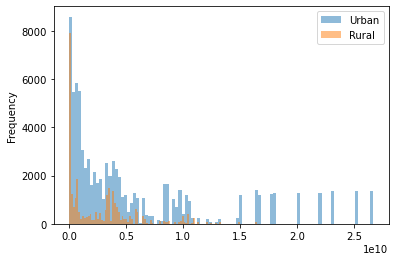

In [80]:
dfJoin_urban["tot_func_exp"].plot(kind = 'hist',label="Urban",alpha=0.5, bins=100)
dfJoin_rural["tot_func_exp"].plot(kind = 'hist',label="Rural",alpha=0.5, bins=100)
plt.legend(loc='best')
plt.show



Sun_Features = ['tot_revenue','tot_comm_bnfts','hospital_bed_count','unreim_costs','unreim_medcd','comm_bldg_actvs','comm_bldg_actvs_cmntysuprt','comm_bldg_actvs_wrkfrcdevlp','tot_func_exp',
              'mdcre_shrtfl_tot_func_exp_pct', 'bad_debt_tot_func_exp_atrb_pat_elig_fncl_asst_pct', 'bad_debt_tot_func_exp_pct' ,'comm_bldg_actvs_tot_func_exp_pct','cash_inknd_contrib_comm_grps_tot_func_exp_pct','rsrch_tot_func_exp_pct','subsd_hlth_svcs_tot_func_exp_pct',
               'hlth_prof_educ_tot_func_exp_pct','comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct','unreim_costs_tot_func_exp_pct']




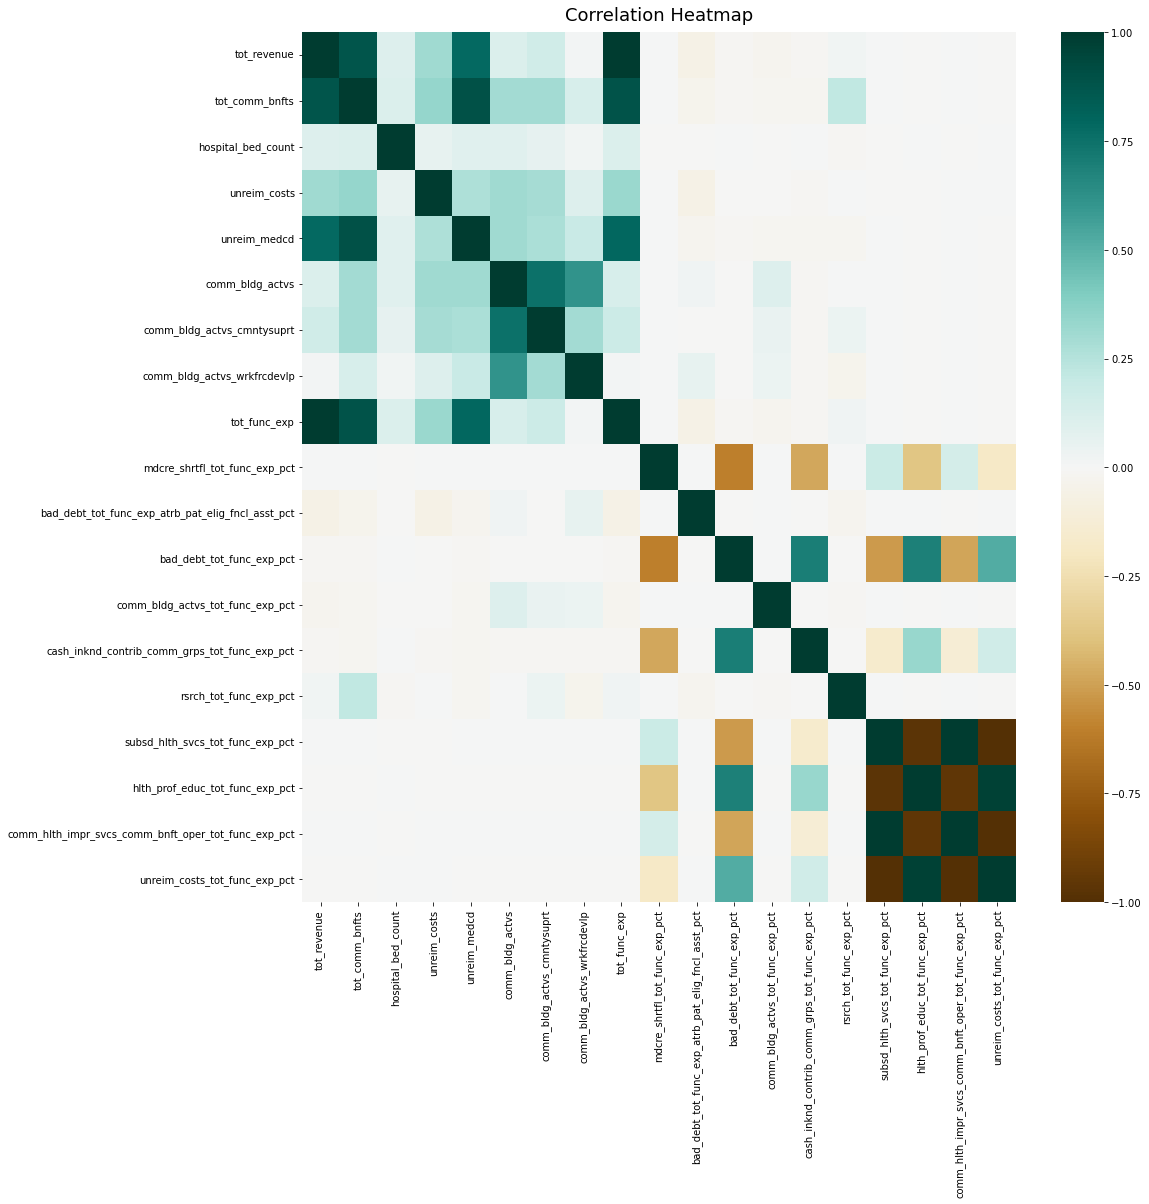

In [81]:
## Check the correlation of selected features
## In the pervious section, we walked through the features, and selected the ones that make sense (we think they might be assocaited with target variables), and also check the 
## distibution of them. Then we do a final check of correlation of these selected varibles for modeling part. As you can see in the correlation heatmap, we have two disticnt groups
## of correlated variables. the first block belongs to the variables with numeric value, and the second bolock (bottom right) belongs to variables with %. 

dfJoin_sub = dfJoin[Sun_Features]
MyCorr=dfJoin_sub.corr()

plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(MyCorr, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [6]:
 dfJoin.urban_location_f
 

0         N
1         N
2         N
3         N
4         N
         ..
113585    N
113586    N
113587    N
113588    N
113589    N
Name: urban_location_f, Length: 113590, dtype: object

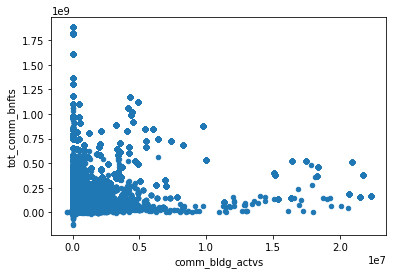

In [82]:
dfJoin.plot(kind = 'scatter', x = 'comm_bldg_actvs', y = 'tot_comm_bnfts')

plt.show()

#In this section, we look at the scatter plot between community building and total community benefit to visualy check the correlation between 2 varriables.  
#and you can see we don't observe the very strong correlation between community building and total community benefit
#The correlation between 2 variables is 0.300941, according to dfJoin.corr()

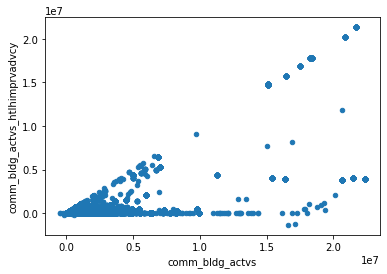

In [83]:
dfJoin.plot(kind = 'scatter', x = 'comm_bldg_actvs', y = 'comm_bldg_actvs_htlhimprvadvcy')

plt.show()


#In this section, we look at the scatter plot between community building and community health improvement advocacy activities to visualy check the correlation between 2 varriables.
#and you can see we  observe the  strong  positive correlation (0.561341) between community building and community health improvement advocacy activities 
#The correlation between 2 variables is 0.561341, according to dfJoin.corr()

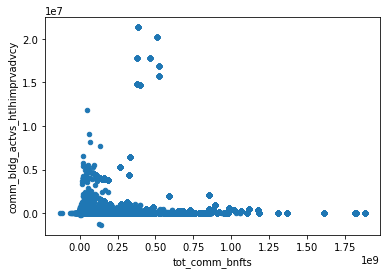

In [84]:
dfJoin.plot(kind = 'scatter', x = 'tot_comm_bnfts', y = 'comm_bldg_actvs_htlhimprvadvcy')

plt.show()
# 

#In this section, we look at the scatter plot between total community benefit and community health improvement advocacy activities to visualy check the correlation between 2 varriables.
#and you can see we  observe the  no correlation (0.076235)  very weak between community building and community health improvement advocacy activities 
#The correlation between 2 variables is 0.076235, according to dfJoin.corr()

In [85]:
# In this section, we train logisic regression to predict wthether given hospital is urbune, or rural

## In this pervious section, I checked the distubution of the featurs, and we have notced that:;
## i) different features are in different scale
## ii) Some of these features don't show normal distibution. I thought this might challege the logsitic regression to learn good model. So, in order to solve this problem
## I scaled the all the selected features for model (input features) between 0-1. This brings all the features in the similar range, and make the learning model more efficent.
## Without scaling, with the features that I've selected, I was getting prediction accuracy of ˜0.74 and after scaling, I was able to improve the prediction accuracy to 0.81

#from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#split dataset in features and target variable
Sun_Features = ['tot_revenue','tot_comm_bnfts','hospital_bed_count','unreim_costs','unreim_medcd','comm_bldg_actvs','comm_bldg_actvs_cmntysuprt','comm_bldg_actvs_wrkfrcdevlp','tot_func_exp',
              'mdcre_shrtfl_tot_func_exp_pct', 'bad_debt_tot_func_exp_atrb_pat_elig_fncl_asst_pct', 'bad_debt_tot_func_exp_pct' ,'comm_bldg_actvs_tot_func_exp_pct','cash_inknd_contrib_comm_grps_tot_func_exp_pct','rsrch_tot_func_exp_pct','subsd_hlth_svcs_tot_func_exp_pct',
               'hlth_prof_educ_tot_func_exp_pct','comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct','unreim_costs_tot_func_exp_pct']
Sun_All=['tot_revenue','tot_comm_bnfts','hospital_bed_count','unreim_costs','unreim_medcd','comm_bldg_actvs','comm_bldg_actvs_cmntysuprt','comm_bldg_actvs_wrkfrcdevlp','tot_func_exp',
              'mdcre_shrtfl_tot_func_exp_pct', 'bad_debt_tot_func_exp_atrb_pat_elig_fncl_asst_pct', 'bad_debt_tot_func_exp_pct' ,'comm_bldg_actvs_tot_func_exp_pct','cash_inknd_contrib_comm_grps_tot_func_exp_pct','rsrch_tot_func_exp_pct','subsd_hlth_svcs_tot_func_exp_pct',
               'hlth_prof_educ_tot_func_exp_pct','comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct','unreim_costs_tot_func_exp_pct','urban_location_f']

dfJoin_Sub = dfJoin[Sun_All]



# Remove NAs
dfJoin_Final=dfJoin_Sub.dropna(axis=0)

X = dfJoin_Final[Sun_Features] # Features
#dfJoin = dfJoin.reset_index()

#X = dfJoin[Sun_Features] # Features
#dfJoin_Numberic = dfJoin_Numberic.dropna()


# Scale the featurss
X_scaled = (X - X.min())/(X.max()- X.min())
#df_norm = pd.concat((df_norm, data.species), 1)


#X = dfJoin_Numberic
y = dfJoin_Final.urban_location_f # Target variable
# split X and y into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=0)


# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='saga',penalty='l1')

# fit the model with data
logreg.fit(X_train,y_train)

# instantiate the predctive values
y_pred=logreg.predict(X_test)


# performance evaluation: confusion matric
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


/shared/centos7/anaconda3/CPS-10-2021/envs/CPS_10_2021/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[ 4658,  2636],
       [ 2488, 18613]])

In [86]:
X_train.min()

X_train.where(X_train.isna().all(axis=1))
X = dfJoin[Sun_Features] # Features

df2=dfJoin_Sub.dropna(axis=0)
df2
#X_train  113590
y_train

101780    Y
44838     N
84725     N
100022    Y
80910     Y
         ..
21243     Y
45892     Y
42614     N
43568     N
68269     N
Name: urban_location_f, Length: 85185, dtype: object

Text(0.5, 257.44, 'Predicted label')

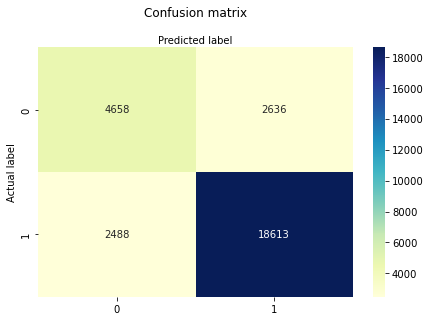

In [89]:
#Visualizing Confusion Matrix using Heatmap


#Confusion matrix a table that is used to define and visualize the performance of classification algorithm
#it compute true positive ( algorith predicted the label positive and the true label also positive)
#false positive (the true label is negative but algorithm predicted positive label )
# true negative (the true label is negtive and algorithm predicted negative label)
#confusion matrix give us a way to look at the specificity and senstivity of our classifier on this trained data 
# true positive is 4658, false positive is 2636
# false negative is 2488, true negative is 18613
# our logistic regression classifier does really good job in predicting true negative label and does a not good in predicting true positive label



%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [90]:
# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#here we compute the accuracy of our classifier which is 81.95% and show descent performance, Just to note that, however, we get good accuracy of our classifier
# but looking at Confusion matrix we can see that our classifier our logistic regression classifier does really good job in predicting true negative label and does a not good in predicting true positive label


Accuracy: 0.8195456946645536


In [57]:
# Second part: 


####Test for statistical significance between each one of those measures among both states (some of that, you have already done in assignment 11 so please add it here again in a sequence flow).


# what are those values below


       tot_comm_bnfts  comm_bldg_actvs  comm_bldg_actvs_htlhimprvadvcy
state                                                                 
AK       9.046153e+15     3.077606e+11                    1.898136e+08
AL       2.175168e+14     3.082515e+09                    4.178344e+08
AR       2.567450e+14     3.990548e+10                    6.710851e+07
AZ       6.366847e+16     4.751443e+12                    3.882364e+10
CA       1.764626e+17     6.793365e+12                    2.608829e+11
CO       5.467479e+16     2.335751e+12                    2.746698e+09
CT       6.785919e+15     9.214947e+11                    2.184651e+10
DC       1.593743e+15     1.091294e+11                    3.323903e+09
DE       2.749286e+15     3.273339e+12                    2.263683e+11
FL       8.889890e+16     3.093289e+13                    2.802138e+13
GA       2.890983e+16     8.596314e+10                    4.835889e+08
HI       1.752691e+17     2.895593e+12                    3.493040e+11
IA    

In [91]:
values= ['NY','ME']
dfJoin_New = dfJoin[dfJoin['state'].isin(values)]
statistical = dfJoin_New[['state','tot_comm_bnfts','comm_bldg_actvs','comm_bldg_actvs_htlhimprvadvcy']]
print(statistical.groupby('state').var())




       tot_comm_bnfts  comm_bldg_actvs  comm_bldg_actvs_htlhimprvadvcy
state                                                                 
ME       8.134304e+14     1.500826e+11                    4.069325e+10
NY       1.521695e+16     1.609377e+11                    1.752200e+10


In [59]:
values= ['NY']
dfJoin_NY = dfJoin_New[dfJoin_New['state'].isin(values)]

In [56]:
dfJoin_NY.describe()


,hosp_id,hospital_org_id,ein,zip_code,hospital_bed_count,Hdata_ein,fiscal_yr,tot_revenue,unreim_costs,tot_comm_bnfts,comm_bldg_actvs,comm_bldg_actvs_htlhimprvadvcy
count,2046.000000,2046.000000,2.046000e+03,2046.000000,2046.000000,2.046000e+03,2046.000000,2.046000e+03,2.046000e+03,2.046000e+03,2.046000e+03,2.046000e+03
mean,2041.109482,1584.291789,1.875707e+08,12418.255621,304.387097,1.875707e+08,2014.469208,6.471635e+08,3.918071e+05,7.214275e+07,1.663930e+05,3.292548e+04
std,53.172688,48.795972,1.492536e+08,1554.978593,323.539772,1.492536e+08,2.887420,9.453306e+08,2.969983e+06,1.233570e+08,4.011704e+05,1.323707e+05
min,1952.000000,1514.000000,6.156270e+07,10003.000000,4.000000,6.156270e+07,2010.000000,-2.810663e+06,-5.856000e+05,-2.293448e+07,0.000000e+00,0.000000e+00
25%,1998.000000,1538.000000,1.317401e+08,10990.000000,95.000000,1.317401e+08,2012.000000,9.690981e+07,0.000000e+00,6.342116e+06,0.000000e+00,0.000000e+00
50%,2037.000000,1577.000000,1.460192e+08,12308.000000,205.000000,1.460192e+08,2014.000000,2.702346e+08,0.000000e+00,2.138018e+07,0.000000e+00,0.000000e+00
75%,2087.000000,1626.000000,1.607725e+08,14081.000000,385.000000,1.607725e+08,2017.000000,7.612568e+08,0.000000e+00,9.302637e+07,1.231690e+05,1.592500e+02
max,2135.000000,1679.000000,9.121543e+08,14905.000000,2262.000000,9.121543e+08,2019.000000,6.714155e+09,8.658246e+07,1.059075e+09,2.932071e+06,2.055502e+06


In [62]:
values= ['ME']
dfJoin_ME = dfJoin_New[dfJoin_New['state'].isin(values)]

In [67]:

tot_comm_bnfts_ME=dfJoin_ME['tot_comm_bnfts']
tot_comm_bnfts_NY=dfJoin_NY['tot_comm_bnfts']


In [68]:
res = ttest_ind(tot_comm_bnfts_ME, tot_comm_bnfts_NY)
print(f'\n Significance Test:\n')
print(res)
## Null hypothesis (H_0): There is no difference in tot_comm_bnfts between states ME and NY. The P-value for this describes that how
## likely you are to have found  this if the nulll hypothesis were true. So, P values used in hypothesis testing to help decide whether to
# reject the null hypothesis. The smaller P-value (less than sigificance level) the more likely you are to reject the null hypothesis, and accept
## the alternative hypthesis. As we can see the  p value for this test is significant(statistic=-8.234841616423378, pvalue=2.939705912855892e-16), which means that we reject the null hypothesis
## and accept the alternative hypothesis, 

## Alternagtive Hypothesis (H_A or H_1): There is difference in Total community benefits between ME and NY

## Explanation
## Why we use T test to tesr for the differnces between two group? T test is one of the metric to check distance/differnce between two distributions.
# In other word, when we intrested to know  whether the means of two distributions are significantly different from each other, we not only need to
## take into consideration the absoult alue of the mean between two distibtuins, but also we need take into account the variance (how data spreaded around the mean)
## of each distibution, and number of data points for each distribution. T test is one of the tests that take into account these factors, and for each T value
## we get p-value as well which tell us about the statifical siginifance of our Null hypothesis.


 Significance Test:

Ttest_indResult(statistic=-8.234841616423378, pvalue=2.939705912855892e-16)


In [69]:
comm_bldg_actvs_ME=dfJoin_ME['comm_bldg_actvs']
comm_bldg_actvs_NY=dfJoin_NY['comm_bldg_actvs']

In [70]:
res2 = ttest_ind(comm_bldg_actvs_ME, comm_bldg_actvs_NY)
print(f'\n Significance Test:\n')
print(res2)
## Null hypothesis (H_0): There is no difference in Community building activities between states ME and NY. The P-value for this describes that how
## likely you are to have found  this if the nulll hypothesis were true. So, P values used in hypothesis testing to help decide whether to
# reject the null hypothesis. The smaller P-value (less than sigificance level) the more likely you are to reject the null hypothesis, and accept
## the alternative hypthesis. As we can see the  p value for this test is significant(statistic=-2.354495436383824, pvalue=0.018629311891835552), which means that we reject the null hypothesis
## and accept the alternative hypothesis, 




 Significance Test:

Ttest_indResult(statistic=-2.354495436383824, pvalue=0.018629311891835552)


In [71]:
comm_bldg_actvs_htlhimprvadvcy_ME=dfJoin_ME['comm_bldg_actvs_htlhimprvadvcy']
comm_bldg_actvs_htlhimprvadvcy_NY=dfJoin_NY['comm_bldg_actvs_htlhimprvadvcy']

In [72]:
res3 = ttest_ind(comm_bldg_actvs_htlhimprvadvcy_ME, comm_bldg_actvs_htlhimprvadvcy_NY)
print(f'\n Significance Test:\n')
print(res3)

## Null hypothesis (H_0): There is no difference in Community health improvement advocacy  between states ME and NY. The P-value for this describes that how
## likely you are to have found  this if the nulll hypothesis were true. So, P values used in hypothesis testing to help decide whether to
# reject the null hypothesis. The smaller P-value (less than sigificance level) the more likely you are to reject the null hypothesis, and accept
## the alternative hypthesis. As we can see the  p value for this test is NOT STATISTCALLY SIGNIFICANT(statistic=0.5504249646114053, pvalue=0.5820799787752249), which means that we not reject the null hypothesis
# because the diference in the means is by chance



 Significance Test:

Ttest_indResult(statistic=0.5504249646114053, pvalue=0.5820799787752249)


<AxesSubplot:title={'center':'tot_comm_bnfts'}, xlabel='state'>

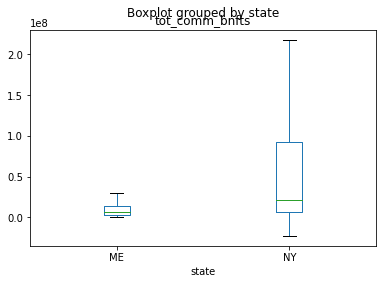

In [73]:
dfJoin_New.boxplot(by='state', column=['tot_comm_bnfts'], showfliers=False, grid = False)

<AxesSubplot:title={'center':'comm_bldg_actvs_htlhimprvadvcy'}, xlabel='state'>

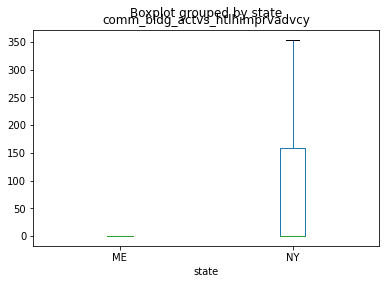

In [74]:
dfJoin_New.boxplot(by='state', column=['comm_bldg_actvs_htlhimprvadvcy'],showfliers=False, grid = False)

<AxesSubplot:title={'center':'comm_bldg_actvs'}, xlabel='state'>

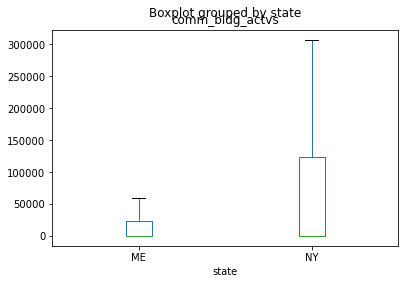

In [56]:
dfJoin_New.boxplot(by='state', column=['comm_bldg_actvs'],showfliers=False, grid = False)

In [75]:
# What is the percentage of spend on each activity type of the overall budget? Notice we have 3 activity types (measures) and two states

# What is the percentage of spend on each activity type of the overall budget among both states?  

# Plot graphs of the above (ideally both states in the same graph)

NameError: name 'tot_comm_bnfts_ME_New3' is not defined